In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation

%matplotlib inline

In [2]:
# Set Alpaca API key and secret
alpaca_api_key = ('PKL4RBF33XX5FPJZ4BG2')
alpaca_secret_key = ('yP7fmDc30U6BWfyXDMwdcYoPMCVKVNmMEjd5AFVF')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [3]:
#monte carlo simulation
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2018-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-05-01', tz='America/New_York').isoformat()

# Set the ticker information
tickers = ['XSD','TAN','SOXX','XLK','VTI']

In [4]:
# Get 5 years' worth of historical data for ALL TICKERS 

df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
df_ticker

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-05-01 04:00:00+00:00,168.30,171.68,168.10,171.49,1042808,6311,170.165287,SOXX
2018-05-02 04:00:00+00:00,171.66,172.20,170.01,170.73,514433,4293,171.164867,SOXX
2018-05-03 04:00:00+00:00,169.39,172.50,168.10,171.75,798953,6252,170.386839,SOXX
2018-05-04 04:00:00+00:00,170.82,176.09,170.04,175.78,659326,5607,174.664469,SOXX
2018-05-07 04:00:00+00:00,177.22,178.31,176.58,177.48,394973,3571,177.471605,SOXX
...,...,...,...,...,...,...,...,...
2023-04-25 04:00:00+00:00,188.49,188.53,182.15,182.17,139796,2522,184.563899,XSD
2023-04-26 04:00:00+00:00,183.54,184.98,181.66,182.63,76391,1632,183.281828,XSD
2023-04-27 04:00:00+00:00,179.77,179.77,172.89,176.51,161787,3550,175.541612,XSD


In [5]:
# Separate ticker data
XSD = df_ticker[df_ticker['symbol']=='XSD'].drop('symbol', axis=1)
TAN = df_ticker[df_ticker['symbol']=='TAN'].drop('symbol', axis=1)
SOXX = df_ticker[df_ticker['symbol']=='SOXX'].drop('symbol', axis=1)
XLK = df_ticker[df_ticker['symbol']=='XLK'].drop('symbol', axis=1)
VTI = df_ticker[df_ticker['symbol']=='VTI'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([XSD, TAN, SOXX, XLK, VTI], axis=1, keys=["XSD", "TAN","SOXX","XLK","VTI"])

# Display sample data
df_ticker.head()

XSD                                           \
                            open   high    low  close  volume trade_count   
timestamp                                                                   
2018-05-01 04:00:00+00:00  67.06  68.35  67.01  68.31  209358        1397   
2018-05-02 04:00:00+00:00  68.48  69.29  68.45  68.70  127402        1010   
2018-05-03 04:00:00+00:00  68.08  69.36  67.43  69.09  151493         907   
2018-05-04 04:00:00+00:00  68.76  70.48  68.54  70.41   49252         405   
2018-05-07 04:00:00+00:00  70.79  71.68  70.64  71.11   67677         437   

                                        TAN                  ...       XLK  \
                                vwap   open     high    low  ...    volume   
timestamp                                                    ...             
2018-05-01 04:00:00+00:00  67.572286  24.61  24.6100  24.26  ...   9273926   
2018-05-02 04:00:00+00:00  68.864030  24.37  24.6764  24.37  ...  13293729   
2018-05-03 04:00:00+00:00  68.172181  24.53  24.5300  24.07  ...  15545469   
2018-05-04 04:00:00+00:00  69.859240  24.06  24.4000  24.05  ...  10841288   
2018-05-07 04:00:00+00:00  71.319817  24.27  24.7400  24.27  ...  13459506   

                                                     VTI                     \
                          trade_count       vwap    open      high      low   
timestamp                                                                     
2018-05-01 04:00:00+00:00       47850  65.785661  136.04  136.6000  135.120   
2018-05-02 04:00:00+00:00       54078  66.430233  136.46  136.9700  135.540   
2018-05-03 04:00:00+00:00       73226  66.087729  135.19  135.8036  133.660   
2018-05-04 04:00:00+00:00       48101  67.284206  134.97  137.5600  134.640   
2018-05-07 04:00:00+00:00       49938  68.154943  137.65  138.3100  137.375   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2018-05-01 04:00:00+00:00  136.51  1762742       20064  135.749989  
2018-05-02 04:00:00+00:00  135.75  1661568       23949  136.283411  
2018-05-03 04:00:00+00:00  135.38  2638105       30422  134.785683  
2018-05-04 04:00:00+00:00  137.11  2379400       16220  136.670539  
2018-05-07 04:00:00+00:00  137.73  1448023       12069  137.915396  

[5 rows x 35 columns]

In [6]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.1,.1,.2,.3,.3],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

XSD                                           \
                            open   high    low  close  volume trade_count   
timestamp                                                                   
2018-05-01 04:00:00+00:00  67.06  68.35  67.01  68.31  209358        1397   
2018-05-02 04:00:00+00:00  68.48  69.29  68.45  68.70  127402        1010   
2018-05-03 04:00:00+00:00  68.08  69.36  67.43  69.09  151493         907   
2018-05-04 04:00:00+00:00  68.76  70.48  68.54  70.41   49252         405   
2018-05-07 04:00:00+00:00  70.79  71.68  70.64  71.11   67677         437   

                                                     TAN           ...  \
                                vwap daily_return   open     high  ...   
timestamp                                                          ...   
2018-05-01 04:00:00+00:00  67.572286          NaN  24.61  24.6100  ...   
2018-05-02 04:00:00+00:00  68.864030     0.005709  24.37  24.6764  ...   
2018-05-03 04:00:00+00:00  68.172181     0.005677  24.53  24.5300  ...   
2018-05-04 04:00:00+00:00  69.859240     0.019106  24.06  24.4000  ...   
2018-05-07 04:00:00+00:00  71.319817     0.009942  24.27  24.7400  ...   

                                 XLK                  VTI                     \
                                vwap daily_return    open      high      low   
timestamp                                                                      
2018-05-01 04:00:00+00:00  65.785661          NaN  136.04  136.6000  135.120   
2018-05-02 04:00:00+00:00  66.430233    -0.001056  136.46  136.9700  135.540   
2018-05-03 04:00:00+00:00  66.087729     0.002266  135.19  135.8036  133.660   
2018-05-04 04:00:00+00:00  67.284206     0.018987  134.97  137.5600  134.640   
2018-05-07 04:00:00+00:00  68.154943     0.007246  137.65  138.3100  137.375   

                                                                    \
                            close   volume trade_count        vwap   
timestamp                                                            
2018-05-01 04:00:00+00:00  136.51  1762742       20064  135.749989   
2018-05-02 04:00:00+00:00  135.75  1661568       23949  136.283411   
2018-05-03 04:00:00+00:00  135.38  2638105       30422  134.785683   
2018-05-04 04:00:00+00:00  137.11  2379400       16220  136.670539   
2018-05-07 04:00:00+00:00  137.73  1448023       12069  137.915396   

                                        
                          daily_return  
timestamp                               
2018-05-01 04:00:00+00:00          NaN  
2018-05-02 04:00:00+00:00    -0.005567  
2018-05-03 04:00:00+00:00    -0.002726  
2018-05-04 04:00:00+00:00     0.012779  
2018-05-07 04:00:00+00:00     0.004522  

[5 rows x 40 columns]

In [7]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012116,0.993257,1.006474,0.999972,0.987668,0.985931,1.001926,0.996102,1.010700,0.996161,...,0.994153,0.986866,1.013842,0.997119,0.995800,1.005206,0.987133,0.986803,1.000138,1.007693
2,1.025756,1.002172,1.015293,1.007245,0.985917,0.994283,0.998520,0.990632,1.016556,0.981217,...,1.017500,0.979333,1.018258,0.994242,1.003427,0.996405,0.996054,0.991173,1.015685,1.015242
3,1.019764,1.001041,1.013325,0.990259,0.990264,0.992781,0.999115,1.003217,1.019244,0.988709,...,1.019898,0.983016,1.012063,0.960077,0.986685,1.014920,0.990434,0.982809,1.010828,1.005238
4,1.014922,0.994622,1.018232,0.998027,0.999463,0.985953,0.998788,1.004043,1.012644,0.997247,...,1.012694,0.978531,1.011314,0.961439,0.969234,1.006814,0.989283,0.989553,1.022593,1.006789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,685.083770,195.363073,93.688723,85.347965,89.078623,194.216665,913.628336,351.430967,1738.745999,962.910825,...,336.234783,336.203897,214.911780,277.674480,226.313663,403.003327,294.773942,367.702206,207.863090,542.088742
7557,684.876292,197.053776,92.394362,84.583339,88.723371,194.720309,912.126153,352.950652,1740.443759,960.392971,...,329.525313,339.592730,215.738653,278.868696,228.611142,403.462744,294.555984,367.058608,206.666710,544.215817
7558,689.038878,197.266962,93.595898,85.961043,90.835568,193.877084,902.968787,353.909943,1731.167429,957.825658,...,323.257166,343.078444,214.161083,282.476943,228.236895,404.451915,297.055998,363.976298,207.778509,536.878811
7559,693.912886,197.917805,94.356404,87.334468,89.815648,196.397754,899.983683,352.454286,1740.930020,962.253839,...,328.360642,339.279340,214.719398,284.223482,231.994916,400.339825,298.228320,361.975550,207.794100,544.644024


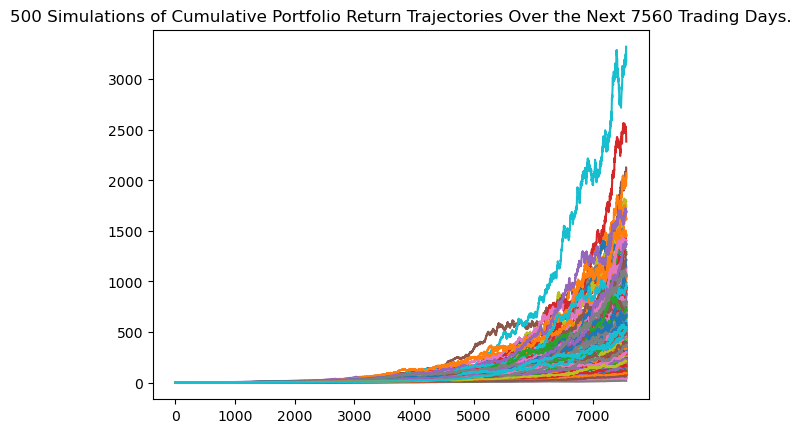

In [8]:
 # Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

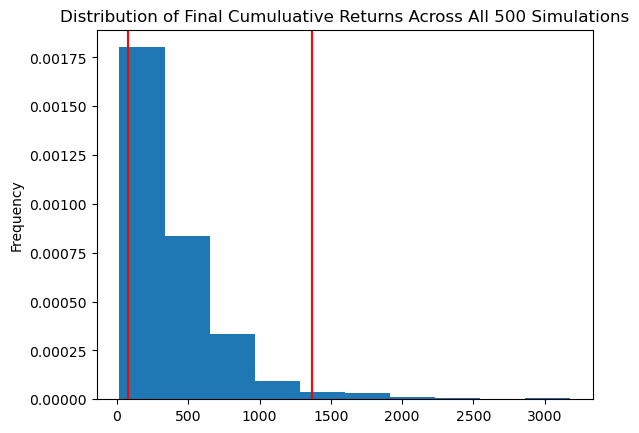

In [9]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

In [10]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count            500.000000
mean             402.428779
std              351.394721
min               16.879820
25%              180.725811
50%              297.832274
75%              517.328949
max             3180.331294
95% CI Lower      78.064314
95% CI Upper    1368.860947
Name: 7560, dtype: float64


In [11]:
# Set initial investment
initial_investment = 14000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*14000,2)
ci_upper = round(tbl[9]*14000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $14000 in the portfolio over the next 30 years will end within in the range of $1092900.39 and $19164053.26


In [12]:
#Sharpe Ratio = (excpected return - risk free rate)/volatility
print((402.428779-2.0)/351.394721)

1.1395412482591052
